In [54]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definindo as equações diferenciais
def equations(t, w):
    x, y, vx, vy = w
    r1 = ((x - 0.5)**2 + y**2)**1.5
    r2 = ((x + 0.5)**2 + y**2)**1.5
    ax = -0.5 * ((x - 0.5) / r1 + (x + 0.5) / r2)
    ay = -0.5 * (y / r1 + y / r2)
    return [vx, vy, ax, ay]

# Função para calcular a energia potencial
def potential_energy(x, y):
    U = -0.5*1/np.sqrt((x - 0.5)**2 + y**2) - 0.5*1/np.sqrt((x + 0.5)**2 + y**2)
    return U



x0 = 0.0
y0 = 0.0
vy0 = 0.0
E = -2.0

def orbita(E,x0,y0,vy0,t_max):
    U0 = potential_energy(x0, y0)

    if U0 > E:
        print('U0=',U0)
        print('E=',E)
        print("Esse Sistema não é possível: U0>E")
        return 1

    K0 = E - U0

    vx0 = np.sqrt(2 * K0 - vy0**2 )



    w0 = [x0, y0, vx0, vy0]

    # Intervalo de tempo
    t_span = (0, t_max)  # Unidades de tempo
    t_eval = np.linspace(*t_span, 100000)

    # Resolver as equações diferenciais
    sol = solve_ivp(equations, t_span, w0, t_eval=t_eval)

    # Soluções
    x_sol = sol.y[0]
    y_sol = sol.y[1]

    #Posição dos planetas
    plt.scatter(0.5, 0,color='red',zorder=2,label = 'Planeta 1')
    plt.scatter(-0.5, 0,color='green',zorder=2,label='Planeta 2')

    #Posição inicial do corpo
    plt.scatter(x0,y0,color='purple',label = 'Posição inicial',zorder=2)

    # Plotar as soluções paramétricas
    plt.plot(x_sol, y_sol,color = 'skyblue',zorder=0)


    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Órbita (Energia = %.1f)'%(E))
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


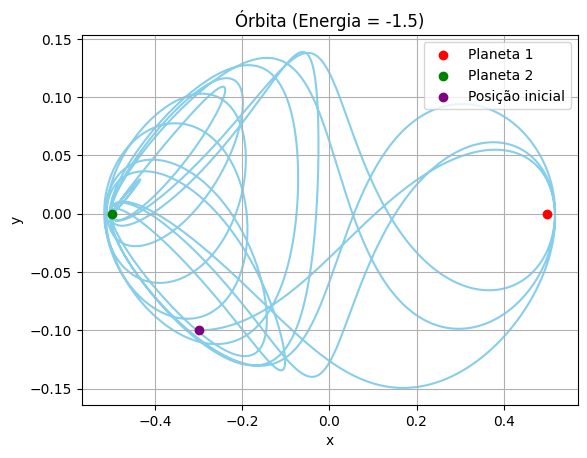

In [55]:
orbita(E=-1.5,x0=-0.3,y0=-0.1,vy0=0.0,t_max=30)

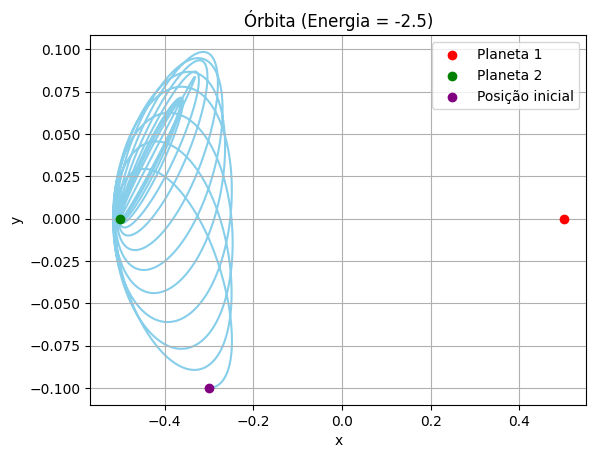

In [56]:
orbita(E=-2.5,x0=-0.3,y0=-0.1,vy0=0.0,t_max=30)

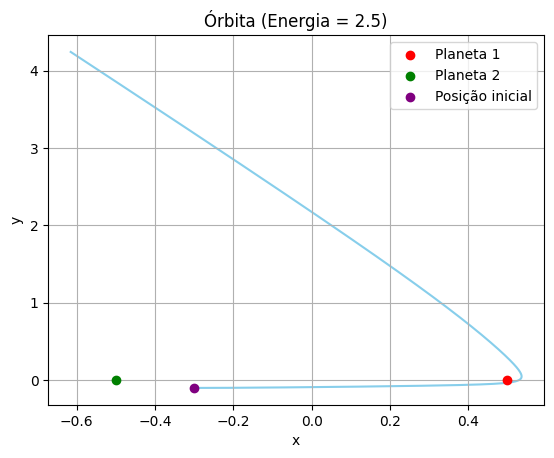

In [58]:
orbita(E=2.5,x0=-0.3,y0=-0.1,vy0=0.0,t_max=2)